In [1]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, box
import matplotlib.pyplot as plt

In [2]:
df = gpd.read_file("../results/full_run/v1/first_run_all.geojson")

In [6]:
df

,polyID,confidence,layer,path,geometry
0,0,0.207167,PNOA_MA_OF_ETRS89_HU31_h50_0643,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((482572.256 4409404.286, 482572.256 4..."
1,1,0.226428,PNOA_MA_OF_ETRS89_HU31_h50_0643,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((480603.767 4409617.461, 480603.767 4..."
2,2,0.244639,PNOA_MA_OF_ETRS89_HU31_h50_0643,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((480932.080 4409571.753, 480932.080 4..."
3,3,0.185060,PNOA_MA_OF_ETRS89_HU31_h50_0643,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((481270.650 4409578.236, 481270.650 4..."
4,4,0.279460,PNOA_MA_OF_ETRS89_HU31_h50_0643,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((480893.242 4409654.009, 480893.242 4..."
...,...,...,...,...,...
68907,155,0.334238,PNOA_MA_OF_ETRS89_HU31_h50_0749,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((512750.564 4353867.770, 512750.564 4..."
68908,156,0.196058,PNOA_MA_OF_ETRS89_HU31_h50_0749,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((514620.417 4353881.778, 514620.417 4..."
68909,157,0.247538,PNOA_MA_OF_ETRS89_HU31_h50_0749,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((514688.168 4353897.801, 514688.168 4..."
68910,158,0.266268,PNOA_MA_OF_ETRS89_HU31_h50_0749,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((512733.645 4353919.290, 512733.645 4..."


In [10]:
df = df.drop_duplicates(subset=["polyID", "geometry"])
df.shape[0]

55076

In [11]:
truth = gpd.read_file("/media/biel/SharedHDD/Master/TFM/Cadastre/cadastre/bounding_boxes/bounding_boxes.shp")
truth.shape

(52375, 28)

In [12]:
overlaps = gpd.sjoin(df, truth)

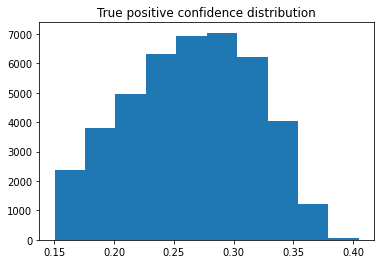

In [13]:
hard_positive = df.loc[overlaps.index]
hard_positive["confidence"].hist(grid=False)
plt.title("True positive confidence distribution");

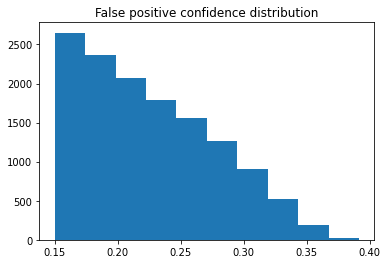

In [14]:
hard_negative = df.loc[~df.index.isin(overlaps.index)]
hard_negative["confidence"].hist(grid=False)
plt.title("False positive confidence distribution");

In [15]:
hard_positive.shape[0]

42939

In [18]:
truth.shape[0]

52375

## LLevar basses i estancs dels negatius

In [41]:
basses = gpd.read_file("../data/basses.geojson")

In [42]:
negatives_basses = gpd.sjoin(hard_negative, basses)

In [43]:
# remove detections that are known water structures
hard_negative = hard_negative.loc[~hard_negative.index.isin(negatives_basses.index)]

In [44]:
hard_negative.shape[0]

10676

In [45]:
hard_positive.to_file("../results/full_run/v1/hard_positive.geojson", driver='GeoJSON')
hard_negative.to_file("../results/full_run/v1/hard_negative.geojson", driver='GeoJSON')

In [48]:
hard_negative.loc[hard_negative.confidence > 0.20].to_file("../results/full_run/v1/hard_negative_gt_20.geojson", driver='GeoJSON')

In [94]:
not_in = gpd.sjoin(truth, res_bbox)
misses = truth.loc[~truth.index.isin(not_in.index)]

In [96]:
misses.to_file("../results/misses.geojson", driver='GeoJSON')

## ROC curve

In [22]:
df["true_positive"] = np.where(df.index.isin(overlaps.index), True, False)
df["false_positive"] = np.where(~df.index.isin(overlaps.index), True, False)

In [23]:
df

,polyID,confidence,layer,path,geometry,true_positive,false_positive
0,0,0.207167,PNOA_MA_OF_ETRS89_HU31_h50_0643,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((482572.256 4409404.286, 482572.256 4...",False,True
1,1,0.226428,PNOA_MA_OF_ETRS89_HU31_h50_0643,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((480603.767 4409617.461, 480603.767 4...",True,False
2,2,0.244639,PNOA_MA_OF_ETRS89_HU31_h50_0643,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((480932.080 4409571.753, 480932.080 4...",True,False
3,3,0.185060,PNOA_MA_OF_ETRS89_HU31_h50_0643,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((481270.650 4409578.236, 481270.650 4...",False,True
4,4,0.279460,PNOA_MA_OF_ETRS89_HU31_h50_0643,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((480893.242 4409654.009, 480893.242 4...",True,False
...,...,...,...,...,...,...,...
68907,155,0.334238,PNOA_MA_OF_ETRS89_HU31_h50_0749,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((512750.564 4353867.770, 512750.564 4...",True,False
68908,156,0.196058,PNOA_MA_OF_ETRS89_HU31_h50_0749,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((514620.417 4353881.778, 514620.417 4...",False,True
68909,157,0.247538,PNOA_MA_OF_ETRS89_HU31_h50_0749,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((514688.168 4353897.801, 514688.168 4...",True,False
68910,158,0.266268,PNOA_MA_OF_ETRS89_HU31_h50_0749,/home/biel/Desktop/test1/PNOA_MA_OF_ETRS89_HU3...,"POLYGON ((512733.645 4353919.290, 512733.645 4...",True,False


In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt

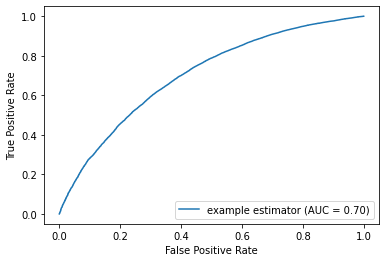

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(df.true_positive, df.confidence)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()      

In [26]:
sum(df.true_positive) / truth.shape[0]

0.7968687350835322

In [27]:
sum(df.true_positive)

41736

In [28]:
truth.shape[0]

52375

In [29]:
sum(df.false_positive)

13340